In [29]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [30]:
# Define State

class BMIState(TypedDict):

    weight_kg : float
    height_m : float
    bmi : float

In [31]:
# Define Graph

graph = StateGraph(BMIState)

In [32]:
def calculator_bmi(state: BMIState) -> BMIState:

    weight=state['weight_kg']
    height=state['height_m']
    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state 

In [33]:
def label_bmi(state : BMIState) -> BMIState:
    bmi = state['bmi']
    if  bmi < 18.5:
        state['category'] = "Underweight"
    elif 18.5 <= bmi <25:
        state['categoty'] = "Normal"
    elif 25 <= bmi < 30:
        state['categoty'] = "Overweight"
    else:
        state['category'] = "Obese"

    return state

In [34]:
# Add nodes to the graph
graph.add_node('calculator_bmi', calculator_bmi)
graph.add_node('label_bmi', label_bmi)

In [35]:
# Add edges to the graph
graph.add_edge(START, 'calculator_bmi')
graph.add_edge('calculator_bmi','label_bmi')
graph.add_edge('label_bmi', END)

In [36]:
# Compile the graph
workflow = graph.compile()

In [37]:
# Execute the graph
initial_state = {'weight_kg': 78,'height_m':1.55 }

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 78, 'height_m': 1.55, 'bmi': 32.47}


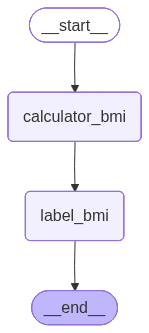

In [39]:

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())